# Supplemental Figure S3: Diversity of two-way junctions

# Setup

## imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from dms_3d_features.plotting import *

## extra functions

## load data

In [2]:
DATA_PATH = "../../data"
REVISION_PATH = "../../data/revisions"

In [4]:
df_res = pd.read_json(f"{DATA_PATH}/raw-jsons/residues/pdb_library_1_residues.json")
df_wc = df_res.query("r_type == 'Flank-WC'").copy()

# Plotting

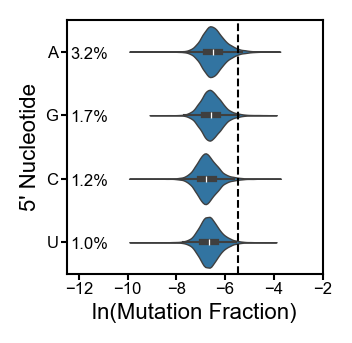

In [ ]:
def plot_p5_res_violins(ax, df):
    df_pos = df.query("r_nuc == 'C'").copy()
    plot_violins_w_percent(
        df_pos, "ln_r_data", "p5_res", color="tab:blue", ax=ax, sorted_by_mean=True
    )
    ax.set_ylabel("5' Nucleotide", labelpad=2)
    ax.set_xlabel("ln(Mutation Fraction)", labelpad=2)
    ax.set_xlim(-12.5, -3)
    ax.set_xticks([-12, -10, -8, -6, -4, -2])
    publication_style_ax(ax)


fig, ax = plt.subplots(figsize=(1.65, 1.65), dpi=200)
plot_p5_res_violins(ax, df_wc)

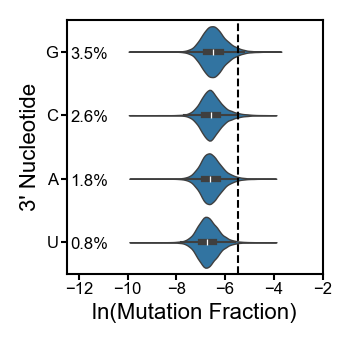

In [ ]:
def plot_p3_res_violins(ax, df):
    df_pos = df.query("r_nuc == 'C'").copy()
    plot_violins_w_percent(
        df_pos, "ln_r_data", "p3_res", color="tab:blue", ax=ax, sorted_by_mean=True
    )
    ax.set_ylabel("3' Nucleotide", labelpad=2)
    ax.set_xlabel("ln(Mutation Fraction)", labelpad=2)
    ax.set_xlim(-12.5, -3)
    ax.set_xticks([-12, -10, -8, -6, -4, -2])
    publication_style_ax(ax)


fig, ax = plt.subplots(figsize=(1.65, 1.65), dpi=200)
plot_p3_res_violins(ax, df_wc)

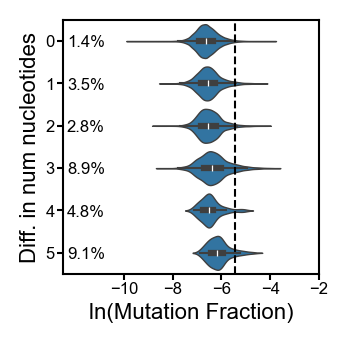

In [ ]:
def plot_side_diff_violins(ax, df):
    df_pos = df.query("r_nuc == 'C'").copy()
    df_pos["side_diff"] = [
        abs(int(x.split("x")[0]) - int(x.split("x")[1])) for x in df_pos["m_token"]
    ]
    df_pos["side_diff"] = df_pos["side_diff"].astype(str)
    df_pos.sort_values("side_diff", inplace=True, ascending=True)
    plot_violins_w_percent(df_pos, "ln_r_data", "side_diff", color="tab:blue", ax=ax)
    ax.set_xlim(-12.5, -3)
    ax.set_xticks([-10, -8, -6, -4, -2])
    ax.set_xlabel("ln(Mutation Fraction)", labelpad=2)
    ax.set_ylabel("Diff. in num nucleotides", labelpad=2)
    publication_style_ax(ax)


fig, ax = plt.subplots(figsize=(1.65, 1.65), dpi=200)
plot_side_diff_violins(ax, df_wc)

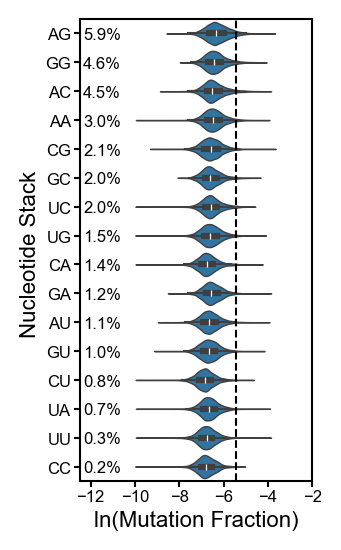

In [24]:
def plot_r_stack_violins(ax, df):
    df_pos = df.query("r_nuc == 'C'").copy()
    plot_violins_w_percent(
        df_pos, "ln_r_data", "r_stack", color="tab:blue", ax=ax, sorted_by_mean=True
    )
    ax.set_xlim(-12.5, -3)
    ax.set_xticks([-12, -10, -8, -6, -4, -2])
    ax.set_xlabel("ln(Mutation Fraction)", labelpad=2)
    ax.set_ylabel("Nucleotide Stack ", labelpad=2)
    publication_style_ax(ax)


fig, ax = plt.subplots(figsize=(1.5, 3.0), dpi=200)
plot_r_stack_violins(ax, df_wc)

In [ ]:
fig_size = (7, 6)
layout = (2, 4)
subplot_size = (1.3, 1.3)  # Each subplot is 4" x 3"
spacing = {
    "hspace": 0.45,  # horizontal spacing in inches
    "wspace": 0.50,  # vertical spacing in inches
    "margins": {"left": 0.40, "right": 0.0, "top": 0.0, "bottom": 0.70},
}

coords_list = calculate_subplot_coordinates(fig_size, layout, subplot_size, spacing)
coords_list = merge_neighboring_coords(coords_list, [1, 5])
# Move the fourth coordinate (index 3) to the end of the list

fig = plt.figure(figsize=fig_size, dpi=150)
ax1 = fig.add_axes(coords_list[0])